# SPOT Kriging in 6 Dimensions: Nyström Approximation vs. Exact (Rosenbrock Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` with and without the Nyström approximation for Kriging surrogates on the 6-dimensional Rosenbrock function.

We use a maximum of 100 function evaluations.

In [1]:
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 6D Rosenbrock Function

In [2]:
# do not change, these are given by the organizers
dim = 6
lower = np.full(dim, -2)
upper = np.full(dim, 2)
fun = Analytical().fun_rosenbrock
fun_evals = 100

## Set up SPOT Controls

## Regression and y as Infill Criterion

In [3]:
init_size = 12
use_nystrom = False
method = "regression"
infill_criterion = "y"
tolerance_x = 1e-6
seed = 321
max_surrogate_points = 24
min_Lambda = -4
max_Lambda = 3
min_theta = -1
max_theta = 1
isotropic = True

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method, max_surrogate_points=max_surrogate_points, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_03_00_17_53_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_00-17-53 for SummaryWriter()


spotpython tuning: 70.61069075266525 [#---------] 13.00% 
spotpython tuning: 70.61069075266525 [#---------] 14.00% 
spotpython tuning: 70.61069075266525 [##--------] 15.00% 
spotpython tuning: 70.61069075266525 [##--------] 16.00% 
spotpython tuning: 68.2426305637601 [##--------] 17.00% 
spotpython tuning: 65.89316764857972 [##--------] 18.00% 
spotpython tuning: 64.08386252869765 [##--------] 19.00% 
spotpython tuning: 62.64330071257144 [##--------] 20.00% 
spotpython tuning: 61.45513257795087 [##--------] 21.00% 
spotpython tuning: 60.46300123541199 [##--------] 22.00% 
spotpython tuning: 59.61407871324233 [##--------] 23.00% 
spotpython tuning: 58.88196169826016 [##--------] 24.00% 
spotpython tuning: 58.243538131725835 [##--------] 25.00% 
spotpython tuning: 58.243538131725835 [###-------] 26.00% 
spotpython tuning: 58.243538131725835 [###-------] 27.00% 
spotpython tuning: 58.243538131725835 [###-------] 28.00% 
spotpython tuning: 58.243538131725835 [###-------] 29.00% 
spotpython

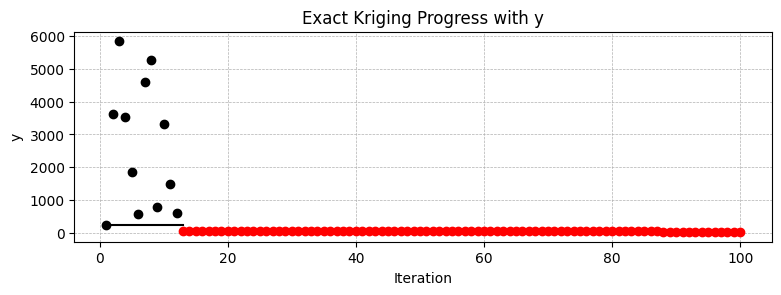

In [5]:
try:
    spot_exact_y = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_y.run()
    exact_success_y = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_y = False
if exact_success_y:
    spot_exact_y.plot_progress(log_y=False, title="Exact Kriging Progress with y")

## Regression  and  Expected Improvement as Infill Criterion

In [6]:
infill_criterion = "ei"

In [7]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, method=method,min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_00-18-19 for SummaryWriter()


spotpython tuning: 72.36985091164657 [#---------] 13.00% 
spotpython tuning: 72.36985091164657 [#---------] 14.00% 
spotpython tuning: 72.36985091164657 [##--------] 15.00% 
spotpython tuning: 52.884601597450896 [##--------] 16.00% 
spotpython tuning: 52.884601597450896 [##--------] 17.00% 
spotpython tuning: 52.884601597450896 [##--------] 18.00% 
spotpython tuning: 52.884601597450896 [##--------] 19.00% 
spotpython tuning: 47.61480473777378 [##--------] 20.00% 
spotpython tuning: 47.61480473777378 [##--------] 21.00% 
spotpython tuning: 47.61480473777378 [##--------] 22.00% 
spotpython tuning: 47.61480473777378 [##--------] 23.00% 
spotpython tuning: 47.61480473777378 [##--------] 24.00% 
spotpython tuning: 47.61480473777378 [##--------] 25.00% 
spotpython tuning: 47.61480473777378 [###-------] 26.00% 
spotpython tuning: 47.61480473777378 [###-------] 27.00% 
spotpython tuning: 47.61480473777378 [###-------] 28.00% 
spotpython tuning: 47.61480473777378 [###-------] 29.00% 
spotpython

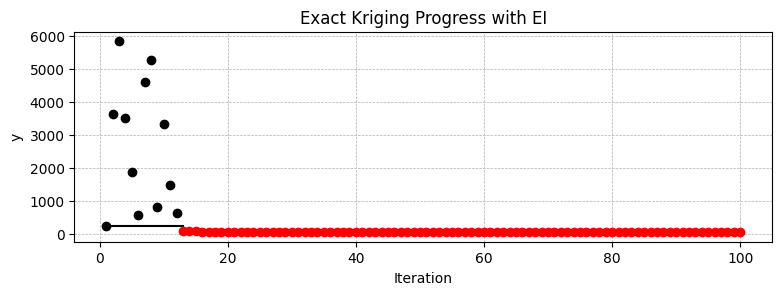

In [8]:
try:
    spot_exact_ei = Spot(
        fun=fun,
        fun_control=fun_control,
        design_control=design_control,
        surrogate_control=surrogate_control_exact
    )
    spot_exact_ei.run()
    exact_success_ei = True
except Exception as e:
    print(f"Exact Kriging failed: {e}")
    exact_success_ei = False
if exact_success_ei:
    spot_exact_ei.plot_progress(log_y=False, title="Exact Kriging Progress with EI")

## Regression and y with Nyström Kriging

In [9]:
use_nystrom = True
nystrom_m = 5
infill_criterion = "y"

In [10]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_00-18-49 for SummaryWriter()


spotpython tuning: 231.60685194157742 [#---------] 13.00% 
spotpython tuning: 231.60685194157742 [#---------] 14.00% 
spotpython tuning: 231.60685194157742 [##--------] 15.00% 
spotpython tuning: 231.60685194157742 [##--------] 16.00% 
spotpython tuning: 231.60685194157742 [##--------] 17.00% 
spotpython tuning: 231.60685194157742 [##--------] 18.00% 
spotpython tuning: 231.60685194157742 [##--------] 19.00% 
spotpython tuning: 231.60685194157742 [##--------] 20.00% 
spotpython tuning: 231.60685194157742 [##--------] 21.00% 
spotpython tuning: 231.60685194157742 [##--------] 22.00% 
spotpython tuning: 231.60685194157742 [##--------] 23.00% 
spotpython tuning: 231.60685194157742 [##--------] 24.00% 
spotpython tuning: 231.60685194157742 [##--------] 25.00% 
spotpython tuning: 231.60685194157742 [###-------] 26.00% 
spotpython tuning: 231.60685194157742 [###-------] 27.00% 
spotpython tuning: 231.60685194157742 [###-------] 28.00% 
spotpython tuning: 231.60685194157742 [###-------] 29.00

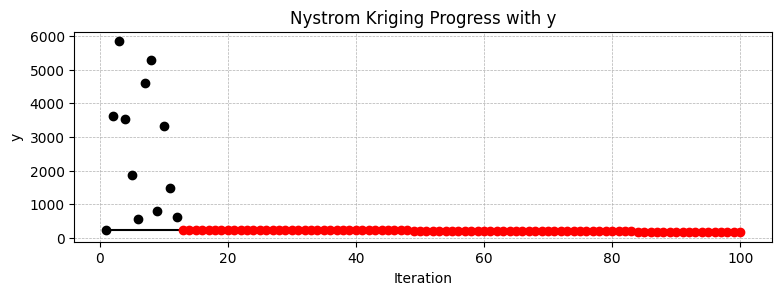

In [11]:
spot_nystrom_y = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_y.run()
spot_nystrom_y.plot_progress(log_y=False, title="Nystrom Kriging Progress with y")

## Regression and ei with Nyström Kriging

In [12]:
infill_criterion = "ei"

In [13]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    infill_criterion=infill_criterion,
    tolerance_x=tolerance_x,
    TENSORBOARD_CLEAN=False,
    tensorboard_log=True
)
design_control = design_control_init(init_size=init_size)
surrogate_control_nystrom = surrogate_control_init(use_nystrom=use_nystrom, nystrom_m=nystrom_m, method=method, min_Lambda=min_Lambda, max_Lambda=max_Lambda, min_theta=min_theta, max_theta=max_theta, isotropic=isotropic)

Seed set to 321


Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-03_00-18-57 for SummaryWriter()


spotpython tuning: 231.60691528417163 [#---------] 13.00% 
spotpython tuning: 231.60682304007975 [#---------] 14.00% 
spotpython tuning: 231.60682304007975 [##--------] 15.00% 
spotpython tuning: 231.60682304007975 [##--------] 16.00% 
spotpython tuning: 231.60682304007975 [##--------] 17.00% 
spotpython tuning: 231.60682304007975 [##--------] 18.00% 
spotpython tuning: 231.60650875311728 [##--------] 19.00% 
spotpython tuning: 231.60650875311728 [##--------] 20.00% 
spotpython tuning: 231.60650875311728 [##--------] 21.00% 
spotpython tuning: 231.60285908675021 [##--------] 22.00% 
spotpython tuning: 231.60283873041584 [##--------] 23.00% 
spotpython tuning: 231.60283873041584 [##--------] 24.00% 
spotpython tuning: 231.60283873041584 [##--------] 25.00% 
spotpython tuning: 231.60283873041584 [###-------] 26.00% 
spotpython tuning: 231.60283873041584 [###-------] 27.00% 
spotpython tuning: 231.60283873041584 [###-------] 28.00% 
spotpython tuning: 231.60283873041584 [###-------] 29.00

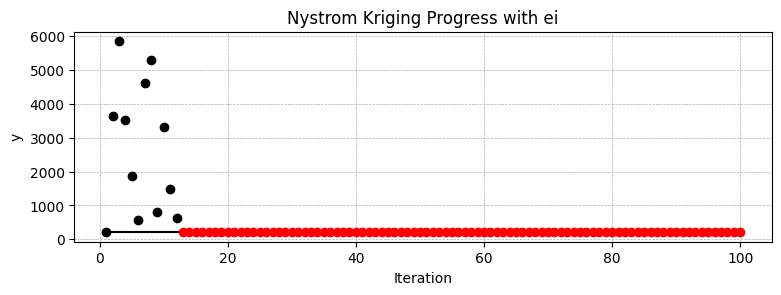

In [14]:
spot_nystrom_ei = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_nystrom
)
spot_nystrom_ei.run()
spot_nystrom_ei.plot_progress(log_y=False, title="Nystrom Kriging Progress with ei")

## Compare Minimum Found

In [15]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_y.min_y:.4f} at x = {spot_exact_y.min_X}")
print(f"[6D] Exact Kriging ei: min y = {spot_exact_ei.min_y:.4f} at x = {spot_exact_ei.min_X}")
print(f"[6D] Nyström Kriging y: min y = {spot_nystrom_y.min_y:.4f} at x = {spot_nystrom_y.min_X}")
print(f"[6D] Nyström Kriging ei: min y = {spot_nystrom_ei.min_y:.4f} at x = {spot_nystrom_ei.min_X}")

[6D] Exact Kriging y: min y = 21.4048 at x = [ 0.36722907 -0.05694174 -0.02503795  0.26680637  0.32446036  0.18169905]
[6D] Exact Kriging ei: min y = 43.3592 at x = [-0.19512791 -0.06365446  0.46878846  0.04867462  0.34877529  0.24925689]
[6D] Nyström Kriging y: min y = 169.4437 at x = [ 0.78838251  0.19047021  0.78256173 -0.22649014  0.36868789  0.483337  ]
[6D] Nyström Kriging ei: min y = 211.9665 at x = [-1.19295836  0.48391023  0.72360892  1.08817995  0.41371495  0.34615332]
